# Customer Churn
- Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame
- It is benificaial for a company to analyze custome churn data to find out reasons customers are dropping out.

In [99]:
random_state = 456

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Dataset

In [2]:
pd.set_option('display.max_column',None)

In [3]:
df = pd.read_csv('./datasets/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# droping unwanted columns
df2 = df.drop('customerID', axis = 1)

# dropping records not having TotalCharges
df2 = df2.drop(df2[df2.TotalCharges == ' '].index)

df2 = df2.reset_index().drop('index', axis = 1)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
obj_cols = df2.select_dtypes('O').columns

binary_cols = []
multiclass_cols = []

for i in obj_cols:
    if len(df[i].unique())>2:
        multiclass_cols.append(i)
    else:
        binary_cols.append(i)

In [8]:
for i in binary_cols:
    print(f'{i}------{df[i].unique()}')

gender------['Female' 'Male']
Partner------['Yes' 'No']
Dependents------['No' 'Yes']
PhoneService------['No' 'Yes']
PaperlessBilling------['Yes' 'No']
Churn------['No' 'Yes']


In [9]:
for i in multiclass_cols:
    print(f'{i}------{df[i].unique()}')

MultipleLines------['No phone service' 'No' 'Yes']
InternetService------['DSL' 'Fiber optic' 'No']
OnlineSecurity------['No' 'Yes' 'No internet service']
OnlineBackup------['Yes' 'No' 'No internet service']
DeviceProtection------['No' 'Yes' 'No internet service']
TechSupport------['No' 'Yes' 'No internet service']
StreamingTV------['No' 'Yes' 'No internet service']
StreamingMovies------['No' 'Yes' 'No internet service']
Contract------['Month-to-month' 'One year' 'Two year']
PaymentMethod------['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges------['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [10]:
# converting catagorical variables to numerical
gender_map = {'Female':0, 'Male':1}
yes_no_map = {'Yes':1,'No':0}
MultipleLines_map = {'Yes':1,'No':0,'No phone service': -1}
yes_no_n_internetservice_map = {'Yes':1,'No':0,'No internet service': -1}
contract_map = {'Month-to-month':0,'One year':1,'Two year':2}

df3 = df2.copy()

df3.gender = df2.gender.map(gender_map)
df3.MultipleLines = df2.MultipleLines.map(MultipleLines_map)
df3.Contract = df2.Contract.map(contract_map)
df3.TotalCharges  = [float(i) for i in df2.TotalCharges]

for i in binary_cols[1:]:
    df3[i] = df2[i].map(yes_no_map)

for i in multiclass_cols[2:8]:
    df3[i] = df2[i].map(yes_no_n_internetservice_map)

In [11]:
cols = ['InternetService_FiberOptic','InternetService_No','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

df4 = df3.drop(['InternetService','PaymentMethod'],axis = 1)

ohe = OneHotEncoder(sparse=False, drop='first')
dummy_df = pd.DataFrame(ohe.fit_transform(df3[['InternetService','PaymentMethod']]),columns=cols)
df4 = df4.join(dummy_df)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_FiberOptic,InternetService_No,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
0,0,0,1,0,1,0,-1,0,1,0,0,0,0,0,1,29.85,29.85,0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,1,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,-1,1,0,1,1,0,0,1,0,42.30,1840.75,0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,1,1.0,0.0,0.0,1.0,0.0


 # Analysis

In [12]:
bar_cols = [i for i in obj_cols if i not in ['InternetService','PaymentMethod','Churn','TotalCharges']]
bar_cols.extend(cols)

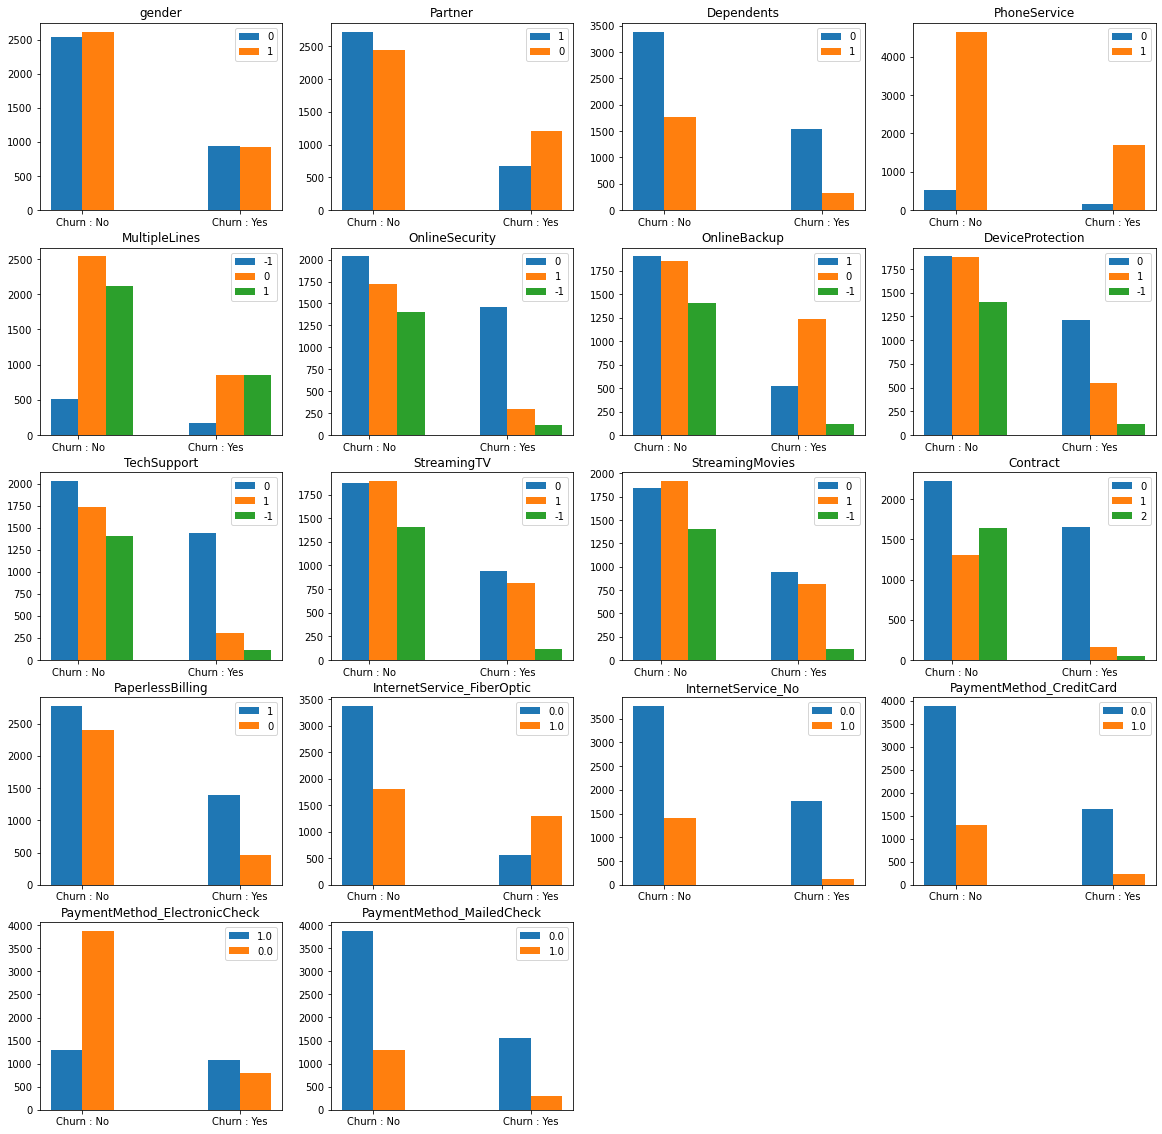

In [13]:
plt.figure(figsize=(20,20))
for j in range(len(bar_cols)):
    temp = 0
    plt.subplot(5,4,j+1)
    plt.title(f'{bar_cols[j]}')
    for i in df4[bar_cols[j]].unique():
        width = 0.2
        x_labels = [i+temp for i in [0,1]]
        values = df4[df4[bar_cols[j]] == i].Churn.value_counts().to_dict()
        y_heights = [values[0],values[1]]
        plt.bar(x_labels,y_heights,width=width, label = f'{i}')
        plt.xticks(df4.Churn.unique()+width/2, ['Churn : No', 'Churn : Yes'])
        temp = temp+width
        plt.legend()

# train_test_split and scaling

In [14]:
X = df4.drop('Churn', axis = 1)
y = df4.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=random_state)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# PCA

In [102]:
pca = PCA(0.99)
component1 = pca.fit_transform(X_train_scaled)
component2 = pca.transform(X_test_scaled)

X_train_pca = pd.DataFrame(component1,columns=['PC_'+str(i+1) for i in range(component.shape[1])])
X_test_pca = pd.DataFrame(component2,columns=['PC_'+str(i+1) for i in range(component.shape[1])])

# Model

In [104]:
X_train_pca.shape

(5625, 19)

In [134]:
model = keras.Sequential([
    keras.layers.Dense(19,input_shape = (19,),activation = 'relu'),
    keras.layers.Dense(19,input_shape = (19,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

tb_calback = keras.callbacks.TensorBoard(log_dir = './logs/customer_churn_adam')

In [135]:
model.fit(X_train_pca,y_train, epochs=100, callbacks=tb_calback)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7236
Epoch 2/100
176/176 [==============================] - 0s 960us/step - loss: 0.4403 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 0s 950us/step - loss: 0.4268 - accuracy: 0.7963
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8009
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8028
Epoch 8/100
176/176 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.80 - 0s 891us/step - loss: 0.4137 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 948us/step - loss: 0.4125 - accuracy: 0.8053
Epoch 10/100
176/176 [===================

176/176 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8238
Epoch 77/100
176/176 [==============================] - 0s 961us/step - loss: 0.3719 - accuracy: 0.8229
Epoch 78/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8240
Epoch 79/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8242
Epoch 80/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8256
Epoch 81/100
176/176 [==============================] - 0s 953us/step - loss: 0.3703 - accuracy: 0.8256
Epoch 82/100
176/176 [==============================] - 0s 957us/step - loss: 0.3691 - accuracy: 0.8252
Epoch 83/100
176/176 [==============================] - 0s 955us/step - loss: 0.3698 - accuracy: 0.8270
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8260
Epoch 85/100
176/176 [==============================] - 0s 952us/step - loss: 0.3682 - 

In [136]:
model.evaluate(X_test_pca,y_test)

44/44 [==============================] - 0s 627us/step - loss: 0.4364 - accuracy: 0.7953


[0.4364410936832428, 0.7953091859817505]

# Model report

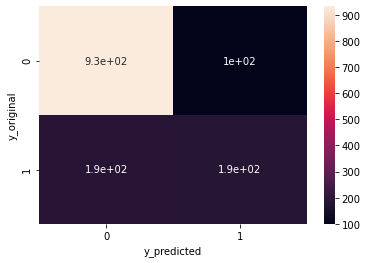

In [152]:
# confusion matrix
y_pred = [1 if i>0.5 else 0 for i in model.predict(X_test_pca).reshape((1407,))]

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_original')
plt.show()

In [144]:
confusion_matrix(y_test,y_pred)

array([[932, 100],
       [188, 187]], dtype=int64)

In [146]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1032
           1       0.65      0.50      0.56       375

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

